In [2]:
from pycalphad import Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei.plot import dataplot
from tinydb import where, Query
import matplotlib.pyplot as plt

['FCC_A1', 'LIQUID', 'BCC_A2', 'CR_PURE', 'CRNI2_71_OI6']
['BCC_A2', 'CR_PURE', 'FCC_A1', 'LIQUID']
['CRNI2_71_OI6', 'CR_PURE', 'FCC_A1']
['CR_PURE', 'FCC_A1', 'BCC_A2']
['LIQUID', 'BCC_A2', 'FCC_A1']
S= {'components': ['CR', 'NI'], 'phases': ['EXP'], 'broadcast_conditions': False, 'conditions': {'T': [1721.0, 1701.0, 1701.0, 1671.0, 1636.0, 1636.0, 1599.0, 1584.0, 1573.0, 1547.0, 1537.0, 1522.0, 1511.0, 1496.0, 1486.0, 1470.0, 1462.0, 1447.0, 1437.0, 1434.0, 1421.0, 1398.0, 1595.0, 1521.0], 'P': [101325.0]}, 'output': 'ZPF', 'values': [[['BCC', ['NI'], [0.2045]], ['LIQUID', ['NI'], [None]]], [['BCC', ['NI'], [0.219]], ['LIQUID', ['NI'], [None]]], [['BCC', ['NI'], [0.2478]], ['LIQUID', ['NI'], [None]]], [['BCC', ['NI'], [0.2663]], ['LIQUID', ['NI'], [None]]], [['BCC', ['NI'], [0.3109]], ['LIQUID', ['NI'], [None]]], [['BCC', ['NI'], [0.3293]], ['LIQUID', ['NI'], [None]]], [['BCC', ['NI'], [0.3805]], ['FCC', ['NI'], [None]]], [['BCC', ['NI'], [0.3655]], ['FCC', ['NI'], [None]]], [['BCC',

<AxesSubplot:title={'center':'Cr-Ni'}, xlabel='X(NI)', ylabel='Temperature (K)'>

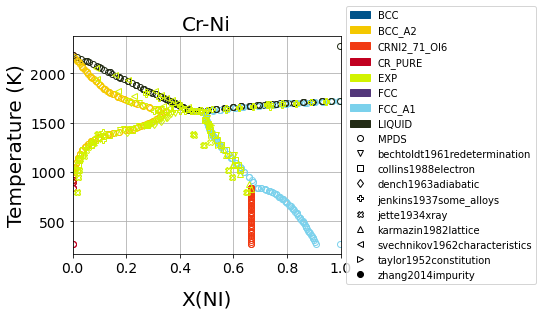

In [13]:

comps = ['CR', 'NI','VA']
#phases = list(dbf.phases.keys())
#print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (300, 4000, 20), v.X('NI'): (0, 1, 0.02)}
datasets = load_datasets(recursive_glob('.','*.json'))

datasets.update({'reference':'MPDS'},Query().reference.search('C10'))

for records in datasets:
    if records['reference']!='MPDS':
        records['phases']=['EXP']
        print('S=',records)
        #for i in range(len(records['conditions']['T'])):
         #   records['conditions']['T'][i]=records['conditions']['T'][i]+273
        
        for i in range(len(records['values'])):
            print('N=',records['values'][i])
            for j in range(len(records['values'][i])):
                records['values'][i][j][0] = 'EXP'
        #print('Y=',records)
    a=records['phases']
    records['phases']=['BCC_A2' if o=='CR0.8NI0.2_229_CI2' else o for o in records['phases']]
    records['phases']=['LIQUID' if o=='L' else o for o in records['phases']]
    records['phases']=['SIGMA' if o=='CR0.5FE0.5_136_TP30' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='CR0.28NI0.72_225_CF4' or o=='FCC' else o for o in records['phases']]
    records['phases']=['LAVES_PHASE_C15' if o=='NBCR2_227_CF24' else o for o in records['phases']]
    records['phases']=['BCC_A2' if o=='BCC' else o for o in records['phases']]
    datasets.update({'phases':records['phases']},where('phases')==a)
    print(records['phases'])
    for i in range(len(records['values'])):
        for j in range(len(records['values'][i])):
            records['values'][i][j] = ['BCC_A2' if o=='CR0.8NI0.2_229_CI2' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LIQUID' if o=='L' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['SIGMA' if o=='CR0.5FE0.5_136_TP30' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='CR0.28NI0.72_225_CF4'or o=='FCC' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LAVES_PHASE_C15' if o=='NBCR2_227_CF24' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['BCC_A2' if o=='BCC' else o for o in records['values'][i][j]]
phases_1 = [r['phases'] for r in datasets]
phases_db = []
for i in phases_1:
    for j in i:
        if j not in phases_db:
            phases_db.append(j)
phases_db.append('EXP')

dataplot(comps, phases_db, conds,datasets,tielines=False)
#plt.ylim(1000,2250)
#plt.xlim(0.8,1)